Name: Bhaskar Bhatt
Roll Number: 2022102003

# Q.1

Q1.a Record a sentence with your own voice, identify the phonemes in the recording audio and mark the phoneme segment boundaries.

In [2]:

import librosa
import numpy as np
import scipy.signal as signal
import matplotlib.pyplot as plt
from scipy.signal import spectrogram


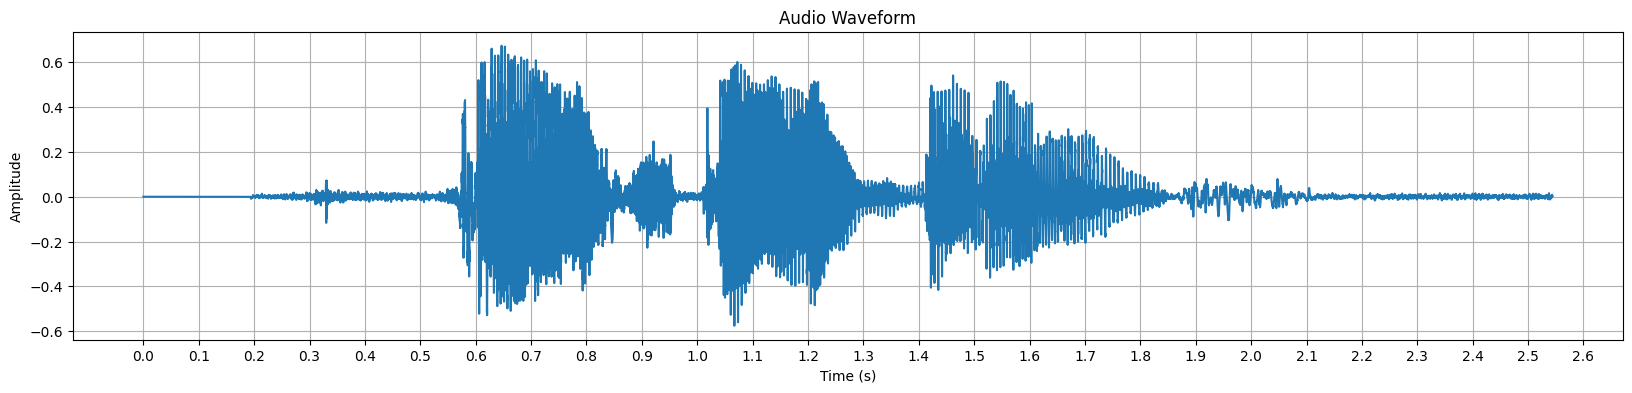

In [8]:

audio_file_path = 'q1.wav'
audio_data, sample_rate = librosa.load(audio_file_path, sr=None)

duration = len(audio_data) / sample_rate
time_values = np.linspace(0, duration, len(audio_data))

plt.figure(figsize = (20, 4))
plt.plot(time_values, audio_data)
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.title('Audio Waveform')
plt.grid(True)
plt.xticks(np.arange(0, duration + 0.1, 0.1))
plt.show()

# 1) Sentence is "He stole the money". 
# 2) Phoneme are: {hh, iy, s, t, ow, l, dh, ah, m, ah, n, iy}
# 3) phoneme_segments = [
#     (0.5121140763633799, 0.6306392298689774, 0, 0),  # hh, non-vowel, unvoiced
#     (0.6395286163818971, 0.8454660705978725, 1, 1),  # iy, vowel, voiced
#     (0.8543554571107923, 0.9891778192234093, 0, 0),  # s, non-vowel, unvoiced
#     (1.002511898992789, 1.0469588315573881, 0, 0),  # t, non-vowel, unvoiced
#     (1.052885089232668, 1.1669655494818054, 1, 1),  # ow, vowel, voiced
#     (1.1728918071570853, 1.318085120201442, 0, 1),  # l, non-vowel, voiced
#     (1.3951264699800803, 1.4425365313823193, 0, 1),  # dh, non-vowel, voiced
#     (1.4484627890575992, 1.5017991081351179, 1, 1),  # ah, vowel, voiced
#     (1.5017991081351179, 1.547727605118537, 0, 1),  # m, non-vowel, voiced
#     (1.5506907339561768, 1.587729844426676, 1, 1),  # ah, vowel, voiced
#     (1.590692973264316, 1.6544002432735745, 0, 1),  # n, non-vowel, voiced
#     (1.6603265009488544, 1.8307064091131506, 1, 1)  # iy, vowel, voiced
# ]
# vowel = 1, non-vowel = 0
# voiced = 1, unvoiced = 0

Ans:-  Sentence is "He stole the money".  Phoneme are: {hh, iy, s, t, ow, l, dh, ah, m, ah, n, iy}. Phoneme segements are in (q1_phoneme.TextGrid) text file and also commented in the code.

Q1.b  Compute short-time energy and short-time ZCR of the recorded audio with 20ms window size with 10ms window shift.

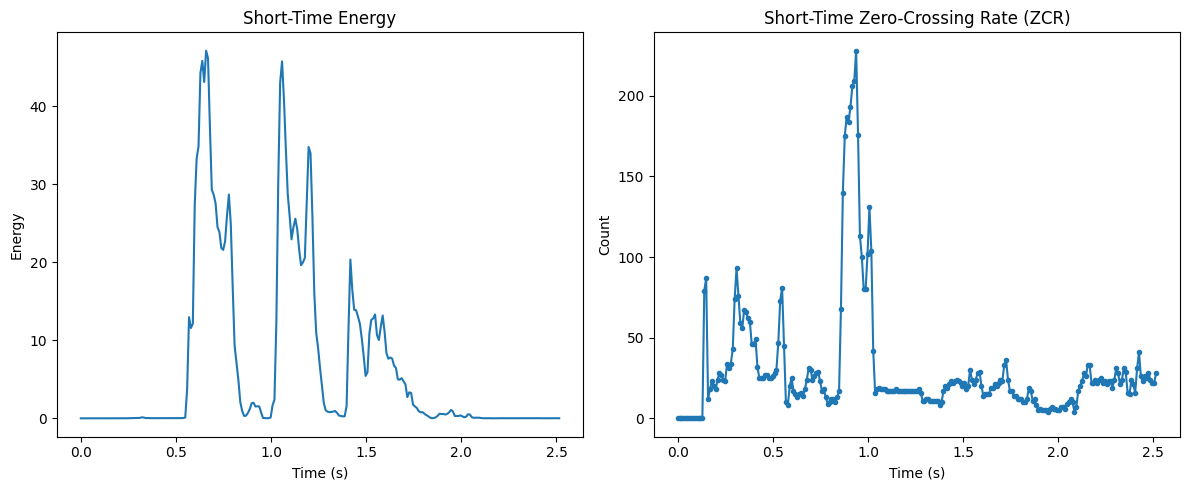

In [11]:
audio_path = 'q1.wav'
signal, sr = librosa.load(audio_path)

frame_size = int(0.02 * sr)  # 20ms frame size
hop_size = int(0.01 * sr)    # 10ms frame shift

energy_list = []
zcr_list = []

for start in range(0, len(signal) - frame_size, hop_size):
    frame = signal[start:start + frame_size]
    
    # Short-Time Energy calculation
    frame_energy = np.sum(np.square(frame))
    energy_list.append(frame_energy)
    
    # Zero-Crossing Rate calculation
    zcr_frame = np.sum(librosa.zero_crossings(frame, pad=False))
    zcr_list.append(zcr_frame)

energy_list = np.array(energy_list)
zcr_list = np.array(zcr_list)

# Time axes for plotting
time_energy = np.arange(len(energy_list)) * (hop_size / sr)
time_zcr = np.arange(len(zcr_list)) * (hop_size / sr)

plt.figure(figsize=(12, 5))

# Plot Short-Time Energy
plt.subplot(1, 2, 1)
plt.plot(time_energy, energy_list)
plt.xlabel('Time (s)')
plt.ylabel('Energy')
plt.title('Short-Time Energy')

# Plot Zero-Crossing Rate
plt.subplot(1, 2, 2)
plt.plot(time_zcr, zcr_list, '.-')
plt.xlabel('Time (s)')
plt.ylabel('Count')
plt.title('Short-Time Zero-Crossing Rate (ZCR)')

plt.tight_layout()
plt.show()

Q1.c Compute an average of short-time energy and short-time ZCR values within each manually marked phoneme segment and compare the averaged values across the 1. vowel and non-vowel phonemes and 2. voiced and unvoiced phonemes. Comment on the observed values.

In [14]:
audio_file = 'q1.wav'
signal, sampling_rate = librosa.load(audio_file)
signal = signal * (2 ** 15)

phoneme_data = [
    (0.5121140763633799, 0.6306392298689774, 0, 0),  # hh, non-vowel, unvoiced
    (0.6395286163818971, 0.8454660705978725, 1, 1),  # iy, vowel, voiced
    (0.8543554571107923, 0.9891778192234093, 0, 0),  # s, non-vowel, unvoiced
    (1.002511898992789, 1.0469588315573881, 0, 0),  # t, non-vowel, unvoiced
    (1.052885089232668, 1.1669655494818054, 1, 1),  # ow, vowel, voiced
    (1.1728918071570853, 1.318085120201442, 0, 1),  # l, non-vowel, voiced
    (1.3951264699800803, 1.4425365313823193, 0, 1),  # dh, non-vowel, voiced
    (1.4484627890575992, 1.5017991081351179, 1, 1),  # ah, vowel, voiced
    (1.5017991081351179, 1.547727605118537, 0, 1),  # m, non-vowel, voiced
    (1.5506907339561768, 1.587729844426676, 1, 1),  # ah, vowel, voiced
    (1.590692973264316, 1.6544002432735745, 0, 1),  # n, non-vowel, voiced
    (1.6603265009488544, 1.8307064091131506, 1, 1)   # iy, vowel, voiced
]

energy_vowels, energy_non_vowels = 0, 0
zcr_vowels, zcr_non_vowels = 0, 0
energy_voiced, energy_unvoiced = 0, 0
zcr_voiced, zcr_unvoiced = 0, 0
vowel_count, non_vowel_count = 0, 0
voiced_count, unvoiced_count = 0, 0

for seg_start, seg_end, is_vowel, is_voiced in phoneme_data:
    start_idx = int(seg_start * sampling_rate)
    end_idx = int(seg_end * sampling_rate)
    
    segment_signal = signal[start_idx:end_idx]
    segment_energy = np.sum(np.square(segment_signal))
    segment_zcr = np.mean(librosa.feature.zero_crossing_rate(segment_signal))
    
    if is_vowel:
        energy_vowels += segment_energy
        zcr_vowels += segment_zcr
        vowel_count += 1
    else:
        energy_non_vowels += segment_energy
        zcr_non_vowels += segment_zcr
        non_vowel_count += 1
    
    if is_voiced:
        energy_voiced += segment_energy
        zcr_voiced += segment_zcr
        voiced_count += 1
    else:
        energy_unvoiced += segment_energy
        zcr_unvoiced += segment_zcr
        unvoiced_count += 1

# (1) Averages for vowels and non-vowels
avg_vowel_energy = energy_vowels / vowel_count if vowel_count else 0
avg_vowel_zcr = zcr_vowels / vowel_count if vowel_count else 0
avg_non_vowel_energy = energy_non_vowels / non_vowel_count if non_vowel_count else 0
avg_non_vowel_zcr = zcr_non_vowels / non_vowel_count if non_vowel_count else 0

# (2) Averages for voiced and unvoiced
avg_voiced_energy = energy_voiced / voiced_count if voiced_count else 0
avg_voiced_zcr = zcr_voiced / voiced_count if voiced_count else 0
avg_unvoiced_energy = energy_unvoiced / unvoiced_count if unvoiced_count else 0
avg_unvoiced_zcr = zcr_unvoiced / unvoiced_count if unvoiced_count else 0

print("Average Energy (Vowels):", avg_vowel_energy)
print("Average Energy (Non-Vowels):", avg_non_vowel_energy)
print("Average Energy (Voiced):", avg_voiced_energy)
print("Average Energy (Unvoiced):", avg_unvoiced_energy)

print("Average ZCR (Vowels):", avg_vowel_zcr)
print("Average ZCR (Non-Vowels):", avg_non_vowel_zcr)
print("Average ZCR (Voiced):", avg_voiced_zcr)
print("Average ZCR (Unvoiced):", avg_unvoiced_zcr)

Average Energy (Vowels): 112661455000.0
Average Energy (Non-Vowels): 40720912000.0
Average Energy (Voiced): 84365420000.0
Average Energy (Unvoiced): 29688314000.0
Average ZCR (Vowels): 0.03122151692708333
Average ZCR (Non-Vowels): 0.07849536298894556
Average ZCR (Voiced): 0.028565421937003968
Average ZCR (Unvoiced): 0.14949544270833334


#### Observations:

1. **Vowels vs. Non-Vowels**:
   - **Energy**: Vowels typically have higher energy because they involve more airflow and are more intense.
   - **ZCR**: Vowels usually have lower ZCR because they produce more continuous and smoother waveforms.

2. **Voiced vs. Unvoiced Phonemes**:
   - **Energy**: Voiced phonemes tend to have higher energy due to the vibration of vocal cords.
   - **ZCR**: Voiced phonemes usually have a lower ZCR, similar to vowels, because of the periodic nature of the waveform, while unvoiced phonemes have a higher ZCR due to the noise-like characteristics.

# Q.3 
Let s(t) = sin(2πf1 t); 0 ≤ t ≤ τ & sin(2πf2 t); τ < t ≤ 1 Else 0, where τ = 0.5sec; f1 = 100Hz; f2 =
200Hz, then empirically find the τ considering amplitude spectrum of STFT with window size of 20ms.

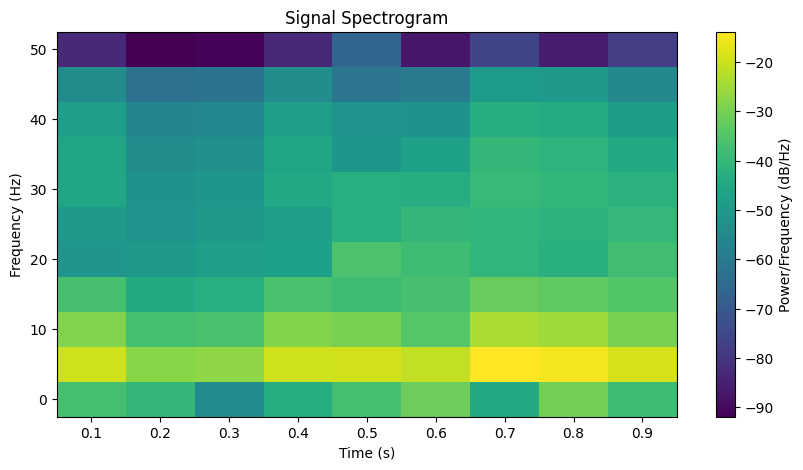

In [15]:
sampling_rate = 100
time_span = 1.0
freq1 = 100
freq2 = 200
transition_point = 0.5

# Generating time vector
time_vector = np.linspace(0, time_span, int(sampling_rate * time_span))

# Creating the signal based on the condition
waveform = np.piecewise(time_vector,
                        [time_vector <= transition_point, time_vector > transition_point],
                        [lambda t: np.sin(2 * np.pi * freq1 * t),
                         lambda t: np.sin(2 * np.pi * freq2 * (t - transition_point))])

# Calculating the spectrogram
freqs, time_segments, Sxx_values = spectrogram(waveform, fs=sampling_rate, nperseg=20, noverlap=10)

# Plotting the spectrogram
plt.figure(figsize=(10, 5))
plt.pcolormesh(time_segments, freqs, 10 * np.log10(Sxx_values))
plt.colorbar(label='Power/Frequency (dB/Hz)')
plt.xlabel('Time (s)')
plt.ylabel('Frequency (Hz)')
plt.title('Signal Spectrogram')
plt.show()

Ans:- We can observe that the frequency transition from 100 to 200 Hz is taking place around the mid of the time interval 0.4 and 0.6.